In [0]:
#Импорт библиотек 
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score

In [0]:
#Монтирую гугл диск, чтобы взять оттуда датасет
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Загружаю данные с гугл диска
data = pd.read_csv('/content/gdrive/My Drive/BlackFriday.csv', sep=",")

# Описание выбранного датасета
### Для выполнения курсовой работы я выбрала датасет "Black Friday"
https://www.kaggle.com/mehdidag/black-friday

Набор данных представляет собой образец транзакций, совершенных в розничном магазине. В частности, здесь проблема заключается в проблеме регрессии, когда мы пытаемся предсказать зависимую переменную (сумму покупки) с помощью информации, содержащейся в других переменных. 
Так как данные предоставлены " Analytics Vidhya" - часть из них представляет закодированные данные.

Также в этом датасете может быть решена проблема классификации. Такая задача мне показалась интереснее и у меня уже есть идеи, куда эту модель можно использовать с пользой.

Данный датасет содержит следующие поля:

User_ID - уникальный идентификатор каждого покупателя (в модели не используется)

Product_ID - уникальный идентификатор каждого товара (в модели не используется)

Gender - пол покупателя (M/F)

Age - возраст покупателя - дается в виде промежутков возрастов 

Occupation - код рода деятельности каждого покупателя

City_Category - категория города, в котором проживает покупатель (данные также закодированы)

Stay_In_Current_City_Years - сколько лет покупатель прожил в данном городе (делится на промежутки 0, 1, 2, 3, 4+ лет)

Marital_Status- семейное положение (0/1)

Product_Category_(2,3) - категория, которой принадлежит товар. Один и тот же товар может принадлежать сразу к нескольким категориям.

Purchase - стоимость покупки в долларах

Product_Category_1 - категория товара. Я выбрала ее целевым признаком. Почему я так сделала - объясню позже.

In [0]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
data.shape

(537577, 12)

In [0]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [0]:
data.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
data['Product_Category_2'] = imp.fit_transform(data[['Product_Category_2']])
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            373299
Purchase                           0
dtype: int64

In [0]:
data['Product_Category_3'] = imp.fit_transform(data[['Product_Category_3']])
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [0]:
print(data['Gender'].unique(), data['Age'].unique(), data['City_Category'].unique(),
data['Stay_In_Current_City_Years'].unique())

['F' 'M'] ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] ['A' 'C' 'B'] ['2' '4+' '3' '1' '0']


In [0]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data[['Gender']])
data['Age'] = le.fit_transform(data[['Age']])
data['City_Category'] = le.fit_transform(data[['City_Category']])
data['Stay_In_Current_City_Years'] = le.fit_transform(data[['Stay_In_Current_City_Years']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [0]:
print(data['Gender'].unique(), data['Age'].unique(), data['City_Category'].unique(),
data['Stay_In_Current_City_Years'].unique())

[0 1] [0 6 2 4 5 3 1] [0 2 1] [2 4 3 1 0]


In [0]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

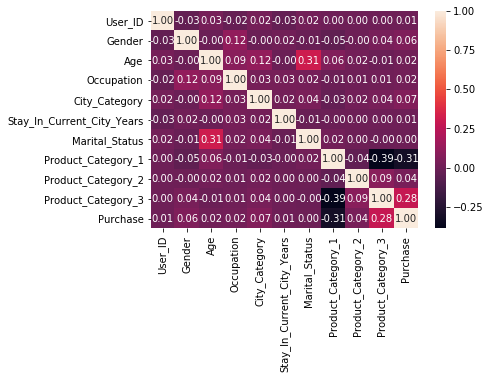

In [0]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', square=False)

In [0]:
data.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.031898,0.033359,-0.023024,0.024107,-0.030655,0.018732,0.003687,0.003663,0.003938,0.005389
Gender,-0.031898,1.000000,-0.004413,0.117294,-0.004129,0.015392,-0.010379,-0.045661,-0.001580,0.035813,0.060086
Age,0.033359,-0.004413,1.000000,0.091898,0.122308,-0.004754,0.312079,0.061951,0.019723,-0.006922,0.017717
Occupation,-0.023024,0.117294,0.091898,1.000000,0.033781,0.031203,0.024691,-0.008114,0.006792,0.011941,0.021104
City_Category,0.024107,-0.004129,0.122308,0.033781,1.000000,0.019948,0.040173,-0.027444,0.019535,0.037751,0.068507
Stay_In_Current_City_Years,-0.030655,0.015392,-0.004754,0.031203,0.019948,1.000000,-0.012663,-0.004182,0.001244,0.001992,0.005470
Marital_Status,0.018732,-0.010379,0.312079,0.024691,0.040173,-0.012663,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.045661,0.061951,-0.008114,-0.027444,-0.004182,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,-0.001580,0.019723,0.006792,0.019535,0.001244,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.035813,-0.006922,0.011941,0.037751,0.001992,-0.004363,-0.389048,0.090284,1.000000,0.284120


In [0]:
cols_x = ['Gender', 'Age', 'Occupation', 'City_Category', 
          'Stay_In_Current_City_Years', 'Marital_Status',
          'Product_Category_2', 'Product_Category_3', 'Purchase', ]   
# целевой признак
col_y = 'Product_Category_1'
#разделение данных
X_train, X_test, y_train, y_test = train_test_split(data[cols_x][0:50000], data[col_y][0:50000], test_size = 0.5, random_state = 11)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

25000 25000


## Функция перевода предсказанного признака в бинарный

In [0]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [0]:
# Если целевой признак == 8, 
# то будем считать этот случай 1 в бинарном признаке
bin_y_test = convert_target_to_binary(y_test, 8)
list(zip(y_test, bin_y_test))[0:15]

[(5, 0),
 (2, 0),
 (5, 0),
 (11, 0),
 (1, 0),
 (1, 0),
 (6, 0),
 (11, 0),
 (8, 1),
 (4, 0),
 (4, 0),
 (16, 0),
 (1, 0),
 (8, 1),
 (8, 1)]

# Модели без подобранных параметров 

## K-ближайших соседей

In [0]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors = 3)

In [0]:
KNeighborsClassifierObj.fit(X_train, y_train)
target_knei = KNeighborsClassifierObj.predict(X_test)

In [0]:
# Конвертация предсказанных признаков
bin_target_knei = convert_target_to_binary(target_knei, 8)

In [0]:
ac_knei = accuracy_score(y_test, target_knei)
bas_knei = balanced_accuracy_score(bin_y_test, bin_target_knei)
rec_knei = recall_score(bin_y_test, bin_target_knei)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_knei, bas_knei, rec_knei))

accuracy_score: 0.87892
balanced_accuracy_score: 0.9446752419437592
recall_score: 0.9306682116647355


## Градиентный спуск 

In [0]:
grad = SGDClassifier().fit(X_train, y_train)
target_grad = grad.predict(X_test)

In [0]:
# Конвертация предсказанных признаков
bin_target_grad = convert_target_to_binary(target_grad, 8)

In [0]:
ac_grad = accuracy_score(y_test, target_grad)
bas_grad = balanced_accuracy_score(bin_y_test, bin_target_grad)
rec_grad = recall_score(bin_y_test, bin_target_grad)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_grad, bas_grad, rec_grad))

accuracy_score: 0.04544
balanced_accuracy_score: 0.4987363880755799
recall_score: 0.028196214754731556


## Дерево принятия решений

In [0]:
dtcl = DecisionTreeClassifier().fit(X_train, y_train)
target_dtc = dtcl.predict(X_test)

In [0]:
# Конвертация предсказанных признаков
bin_target_dtc = convert_target_to_binary(target_dtc, 8)

In [0]:
ac_dtc = accuracy_score(y_test, target_dtc)
bas_dtc = balanced_accuracy_score(bin_y_test, bin_target_dtc)
rec_dtc = recall_score(bin_y_test, bin_target_dtc)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_dtc, bas_dtc, rec_dtc))

accuracy_score: 0.90616
balanced_accuracy_score: 0.9408931650827164
recall_score: 0.9036307454615682


## Модель бэггинга

In [0]:
bag = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=10).fit(X_train, y_train)
target_bag = bag.predict(X_test)

In [0]:
# Конвертация предсказанных признаков
bin_target_bag = convert_target_to_binary(target_bag, 8)

In [0]:
ac_bag = accuracy_score(y_test, target_bag)
bas_bag = balanced_accuracy_score(bin_y_test, bin_target_bag)
rec_bag = recall_score(bin_y_test, bin_target_bag)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_bag, bas_bag, rec_bag))

accuracy_score: 0.92584
balanced_accuracy_score: 0.9647756009558848
recall_score: 0.9544225569718038


## Случайный лес

In [0]:
forest = RandomForestClassifier(random_state=1, max_features = 2).fit(X_train, y_train)
target_forest = forest.predict(X_test)

In [0]:
# Конвертация предсказанных признаков
bin_target_forest = convert_target_to_binary(target_forest, 8)

In [0]:
ac_forest = accuracy_score(y_test, target_forest)
bas_forest = balanced_accuracy_score(bin_y_test, bin_target_forest)
rec_forest = recall_score(bin_y_test, bin_target_forest)
print('''accuracy_score: {0}
balanced_accuracy_score: {1}
recall_score: {2}'''.format(ac_forest, bas_forest, rec_forest))

accuracy_score: 0.79264
balanced_accuracy_score: 0.8888389205450331
recall_score: 0.8346852066434917


# Подбор гиперпараметров с использованием GridSearchCV и кросс-валидации

## K- ближайших соседей

In [0]:
n_range_knei = np.array(range(1,30,1))
tuned_parameters_knei = [{'n_neighbors': n_range_knei}]
tuned_parameters_knei

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}]

Из-за большого объема данных, подбор параметров проходит не на всем датасете, а только на его части

In [0]:
knei_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters_knei, cv=KFold(n_splits=5), scoring= 'accuracy')
knei_gs.fit(data[cols_x][0:10000], data[col_y][0:10000])

In [0]:
knei_gs.best_params_

{'n_neighbors': 5}

### Обучение с подобранным параметром



In [0]:
knei_gs.best_estimator_.fit(X_train, y_train)
target_knei_gs = knei_gs.best_estimator_.predict(X_test)

### Проверка качества модели

In [0]:
# Конвертация предсказанных признаков
bin_target_knei_gs = convert_target_to_binary(target_knei_gs, 8)

In [0]:
ac_knei_gs = accuracy_score(y_test, target_knei_gs)
bas_knei_gs = balanced_accuracy_score(bin_y_test, bin_target_knei_gs)
rec_knei_gs = recall_score(bin_y_test, bin_target_knei_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_knei_gs,3), 
round(bas_knei_gs, 3), round(rec_knei_gs, 3), round(ac_knei, 3), 
round(bas_knei, 3), round(rec_knei, 3)))

accuracy_score          с gs: 0.878, без gs: 0.879
balanced_accuracy_score с gs: 0.952, без gs: 0.945
recall_score            с gs: 0.949, без gs: 0.931


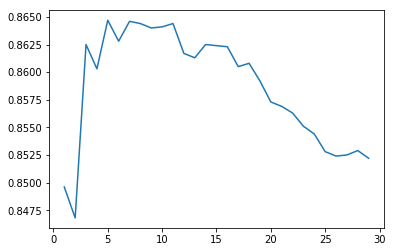

In [0]:
# Изменение качества на обучающей выборке
plt.plot(n_range_knei, knei_gs.cv_results_['mean_test_score'])

## Градиентный спуск

In [0]:
n_range_grad = np.array(np.arange(0.0001,1,0.05))
tuned_parameters = [{'alpha': n_range_grad}]
tuned_parameters

[{'alpha': array([1.000e-04, 5.010e-02, 1.001e-01, 1.501e-01, 2.001e-01, 2.501e-01,
         3.001e-01, 3.501e-01, 4.001e-01, 4.501e-01, 5.001e-01, 5.501e-01,
         6.001e-01, 6.501e-01, 7.001e-01, 7.501e-01, 8.001e-01, 8.501e-01,
         9.001e-01, 9.501e-01])}]

In [0]:
grad_gs = GridSearchCV(SGDClassifier(), tuned_parameters, cv=KFold(n_splits=5), scoring='accuracy')
grad_gs.fit(data[cols_x][0:1000], data[col_y][0:1000])
grad_gs.best_params_

{'alpha': 0.10010000000000001}

### Обучение с подобранным параметром



In [0]:
grad_gs.best_estimator_.fit(X_train, y_train)
target_grad_gs = grad_gs.best_estimator_.predict(X_test)

### Проверка качества модели

In [0]:
# Конвертация предсказанных признаков
bin_target_grad_gs = convert_target_to_binary(target_grad_gs, 8)

In [0]:
ac_grad_gs = accuracy_score(y_test, target_grad_gs)
bas_grad_gs = balanced_accuracy_score(bin_y_test, bin_target_grad_gs)
rec_grad_gs = recall_score(bin_y_test, bin_target_grad_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_grad_gs,3), 
round(bas_grad_gs, 3), round(rec_grad_gs, 3), round(ac_grad, 3), 
round(bas_grad, 3), round(rec_grad, 3)))

accuracy_score          с gs: 0.363, без gs: 0.045
balanced_accuracy_score с gs: 0.5, без gs: 0.499
recall_score            с gs: 0.0, без gs: 0.028


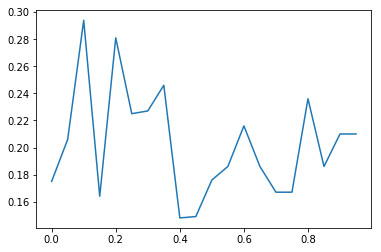

In [0]:
# Изменение качества на обучающей выборке
plt.plot(n_range_grad, grad_gs.cv_results_['mean_test_score'])

## Дерево принятия решений

In [0]:
n_range_dtc = np.array(range(1,1000,30))
tuned_parameters_dtc = [{'max_depth': n_range_dtc}]
tuned_parameters_dtc

[{'max_depth': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
         391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751,
         781, 811, 841, 871, 901, 931, 961, 991])}]

In [0]:
dtc_gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters_dtc, cv=KFold(n_splits=10), scoring= 'accuracy')
dtc_gs.fit(data[cols_x][0:100000], data[col_y][0:100000])
dtc_gs.best_params_

{'max_depth': 991}

### Обучение с подобранным параметром



In [0]:
dtc_gs.best_estimator_.fit(X_train, y_train)
target_dtc_gs = dtc_gs.best_estimator_.predict(X_test)

### Проверка качества модели

In [0]:
# Конвертация предсказанных признаков
bin_target_dtc_gs = convert_target_to_binary(target_dtc_gs, 8)

In [0]:
ac_dtc_gs = accuracy_score(y_test, target_dtc_gs)
bas_dtc_gs = balanced_accuracy_score(bin_y_test, bin_target_dtc_gs)
rec_dtc_gs = recall_score(bin_y_test, bin_target_dtc_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_dtc_gs,3), 
round(bas_dtc_gs, 3), round(rec_dtc_gs, 3), round(ac_dtc, 3), 
round(bas_dtc, 3), round(rec_dtc, 3)))

accuracy_score          с gs: 0.908, без gs: 0.906
balanced_accuracy_score с gs: 0.94, без gs: 0.941
recall_score            с gs: 0.902, без gs: 0.904


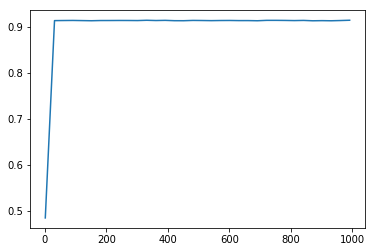

In [0]:
# Изменение качества на обучающей выборке
plt.plot(n_range_dtc, dtc_gs.cv_results_['mean_test_score'])

## Модель бэггинга

In [0]:
n_range_bag = np.array(range(1,202,10))
tuned_parameters = [{'n_estimators': n_range_bag}]
tuned_parameters

[{'n_estimators': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
         131, 141, 151, 161, 171, 181, 191, 201])}]

In [0]:
bag_gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), tuned_parameters, cv=KFold(n_splits=5), scoring='accuracy')
bag_gs.fit(data[cols_x][0:5000], data[col_y][0:5000])
bag_gs.best_params_

{'n_estimators': 51}

### Обучение с подобранным параметром



In [0]:
bag_gs.best_estimator_.fit(X_train, y_train)
target_bag_gs = bag_gs.best_estimator_.predict(X_test)

### Проверка качества модели

In [0]:
# Конвертация предсказанных признаков
bin_target_bag_gs = convert_target_to_binary(target_bag_gs, 6)

In [0]:
ac_bag_gs = accuracy_score(y_test, target_bag_gs)
bas_bag_gs = balanced_accuracy_score(bin_y_test, bin_target_bag_gs)
rec_bag_gs = recall_score(bin_y_test, bin_target_bag_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_bag_gs,3), 
round(bas_bag_gs, 3), round(rec_bag_gs, 3), round(ac_bag, 3), 
round(bas_bag, 3), round(rec_bag, 3)))

accuracy_score          с gs: 0.932, без gs: 0.926
balanced_accuracy_score с gs: 0.477, без gs: 0.965
recall_score            с gs: 0.0, без gs: 0.954


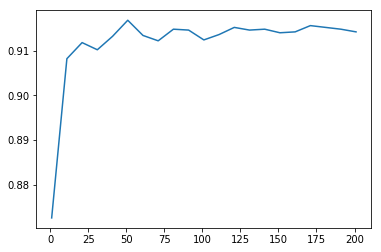

In [0]:
# Изменение качества на обучающей выборке
plt.plot(n_range_bag, bag_gs.cv_results_['mean_test_score'])

## Случайный лес

In [0]:
n_range_forest = np.array(range(1,1000,30))
tuned_parameters_forest = [{'max_depth': n_range_forest}]
tuned_parameters_forest

[{'max_depth': array([  1,  31,  61,  91, 121, 151, 181, 211, 241, 271, 301, 331, 361,
         391, 421, 451, 481, 511, 541, 571, 601, 631, 661, 691, 721, 751,
         781, 811, 841, 871, 901, 931, 961, 991])}]

In [0]:
forest_gs = GridSearchCV(RandomForestClassifier(), tuned_parameters_forest, cv=KFold(n_splits=5), scoring='accuracy')
forest_gs.fit(data[cols_x][0:10000], data[col_y][0:10000])
forest_gs.best_params_

### Обучение с подобранным параметром


In [0]:
forest_gs.best_estimator_.fit(X_train, y_train)
target_forest_gs = bag_gs.best_estimator_.predict(X_test)


### Проверка качества модели

In [0]:
# Конвертация предсказанных признаков
bin_target_forest_gs = convert_target_to_binary(target_forest_gs, 6)

In [0]:
ac_forest_gs = accuracy_score(y_test, target_forest_gs)
bas_forest_gs = balanced_accuracy_score(bin_y_test, bin_target_forest_gs)
rec_forest_gs = recall_score(bin_y_test, bin_target_forest_gs)
print('''accuracy_score          с gs: {0}, без gs: {3}
balanced_accuracy_score с gs: {1}, без gs: {4}
recall_score            с gs: {2}, без gs: {5}'''.format(round(ac_forest_gs,3), 
round(bas_forest_gs, 3), round(rec_forest_gs, 3), round(ac_forest, 3), 
round(bas_forest, 3), round(rec_forest, 3)))

accuracy_score          с gs: 0.932, без gs: 0.793
balanced_accuracy_score с gs: 0.477, без gs: 0.889
recall_score            с gs: 0.0, без gs: 0.835


In [0]:
x = PrettyTable()
x.field_names = ["Model", "accuracy_score", "balanced_accuracy_score", "recall_score"]

In [0]:
x.add_row(["K-соседей GS", round(ac_knei_gs,3), round(bas_knei_gs, 3), 
           round(rec_knei_gs, 3)])
x.add_row(["к-соседей без GS", round(ac_knei, 3), round(bas_knei, 3), 
           round(rec_knei, 3)])
x.add_row(["Градиентный спуск GS", round(ac_grad_gs,3), round(bas_grad_gs, 3), 
           round(rec_grad_gs, 3)])
x.add_row(["Градиентный спуск без GS", round(ac_grad, 3), round(bas_grad, 3), 
              round(rec_grad, 3)])
x.add_row(["Дерево принятия решений GS", round(ac_dtc_gs,3), round(bas_dtc_gs, 3), 
           round(rec_dtc_gs, 3)])
x.add_row(["Дерево принятия решений без GS", round(ac_dtc, 3), 
          round(bas_dtc, 3), round(rec_dtc, 3)])
x.add_row(["Модель бэггинга GS", round(ac_bag_gs,3), round(bas_bag_gs, 3), 
           round(rec_bag_gs, 3)])
x.add_row(["Модель бэггинга без GS", round(ac_bag, 3), round(bas_bag, 3), 
           round(rec_bag, 3)])
x.add_row(["Случайный лес GS", round(ac_forest_gs,3), round(bas_forest_gs, 3), 
           round(rec_forest_gs, 3)])
x.add_row(["Случайный лес без GS", round(ac_forest, 3), 
round(bas_forest, 3), round(rec_forest, 3)])

In [0]:
print(x)

+--------------------------------+----------------+-------------------------+--------------+
|             Model              | accuracy_score | balanced_accuracy_score | recall_score |
+--------------------------------+----------------+-------------------------+--------------+
|          K-соседей GS          |     0.878      |          0.952          |    0.949     |
|        к-соседей без GS        |     0.879      |          0.945          |    0.931     |
|      Градиентный спуск GS      |     0.363      |           0.5           |     0.0      |
|    Градиентный спуск без GS    |     0.045      |          0.499          |    0.028     |
|   Дерево принятия решений GS   |     0.908      |           0.94          |    0.902     |
| Дерево принятия решений без GS |     0.906      |          0.941          |    0.904     |
|       Модель бэггинга GS       |     0.932      |          0.477          |     0.0      |
|     Модель бэггинга без GS     |     0.926      |          0.965    